In [1]:
import xupy as xp
import matplotlib.pyplot as plt


[XuPy] Device 0 available - GPU : `NVIDIA GeForce RTX 4060 Laptop GPU`
       Memory = 7805.56 MB | Compute Capability = 8.9
       Using CuPy 13.5.1 for acceleration.


In [2]:
fs = 1000
T = 1/fs
Td = 2*T

In [3]:
om = lambda f: 2*xp.pi*f
OLTF = lambda G,T,Td,f: G*T/om(f) * (xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi/2)
RESTF = lambda G,T,Td,f: 1.0/(1.0+OLTF(G,T,Td,f))
NTF = lambda G,T,Td,f: OLTF(G,T,Td,f)/(1.0+OLTF(G,T,Td,f))

In [4]:
def plot_tf(tf,freq):
    amp = xp.abs(tf)
    ang = xp.unwrap(xp.angle(tf))

    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(xp.asnumpy(freq),xp.asnumpy(amp))
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim([1e-8,1e-2])

    plt.subplot(2,1,2)
    plt.plot(xp.asnumpy(freq),xp.asnumpy(ang*180/xp.pi))
    plt.grid()
    plt.xscale('log')
    plt.ylim([-270,0])
    plt.yticks([0,-90,-180,-270])

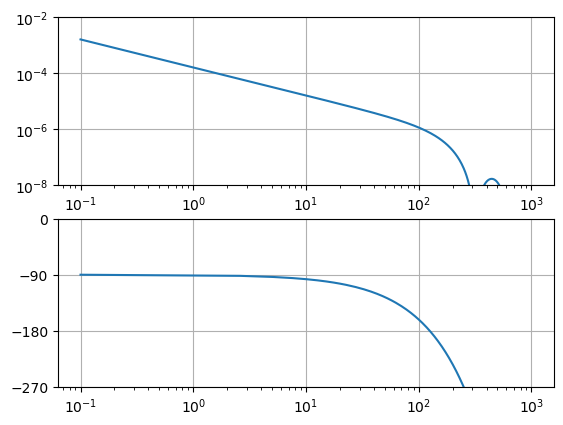

In [5]:
freq = xp.linspace(0.1,1000,400)

G = 1

tf = OLTF(G,T,Td,freq)
plot_tf(tf,freq)

In [6]:
Gopt = xp.pi/(4*T*Td)

Text(0.5, 1.0, 'Noise propagation transfer function')

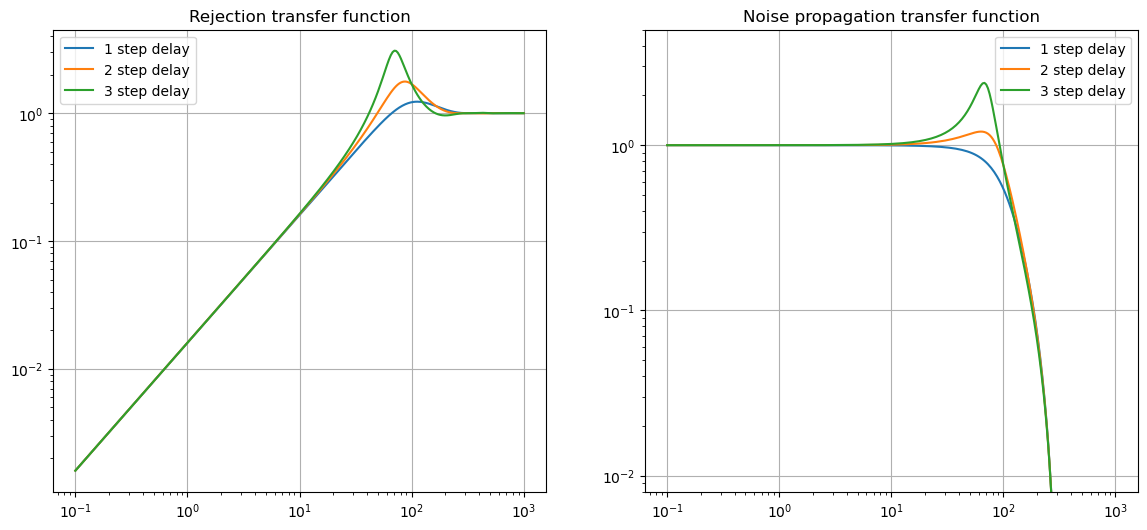

In [7]:
restf1 = RESTF(Gopt,T,T*1,freq)
restf2 = RESTF(Gopt,T,T*2,freq)
restf3= RESTF(Gopt,T,T*3,freq)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf1)),label='1 step delay')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf2)),label='2 step delay')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf3)),label='3 step delay')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

ntf1 = NTF(Gopt,T,T*1,freq)
ntf2 = NTF(Gopt,T,T*2,freq)
ntf3 = NTF(Gopt,T,T*3,freq)

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='1 step delay')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='2 step delay')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf3)),label='3 step delay')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')


Text(0.5, 1.0, 'Noise propagation transfer function')

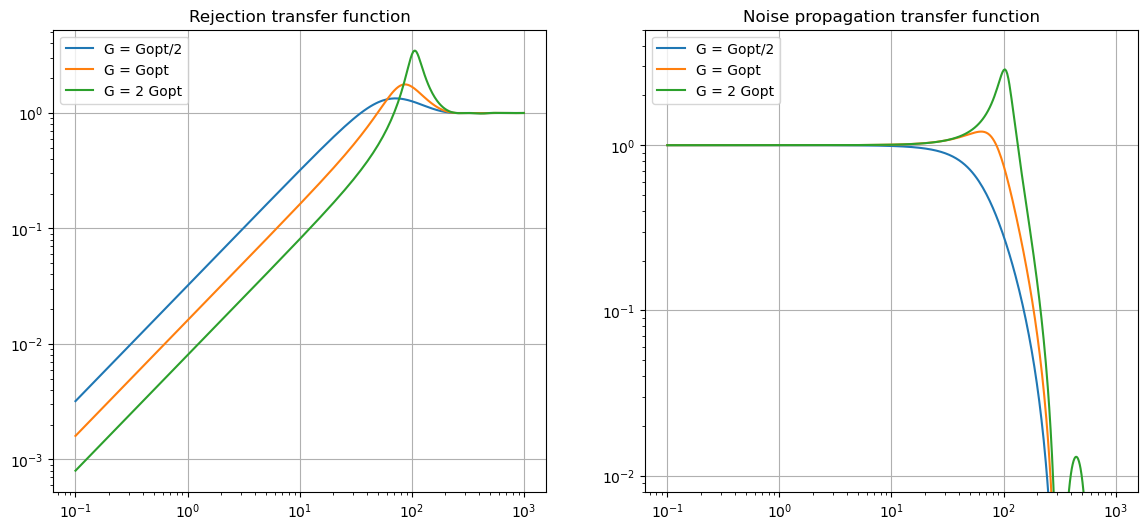

In [8]:
restf1 = RESTF(0.5*Gopt,T,Td,freq)
restf2 = RESTF(Gopt,T,Td,freq)
restf3= RESTF(2*Gopt,T,Td,freq)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf1)),label='G = Gopt/2')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf2)),label='G = Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf3)),label='G = 2 Gopt')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

ntf1 = NTF(0.5*Gopt,T,Td,freq)
ntf2 = NTF(Gopt,T,Td,freq)
ntf3 = NTF(2*Gopt,T,Td,freq)

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='G = Gopt/2')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='G = Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf3)),label='G = 2 Gopt')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')

Text(0.5, 1.0, 'Noise propagation transfer function')

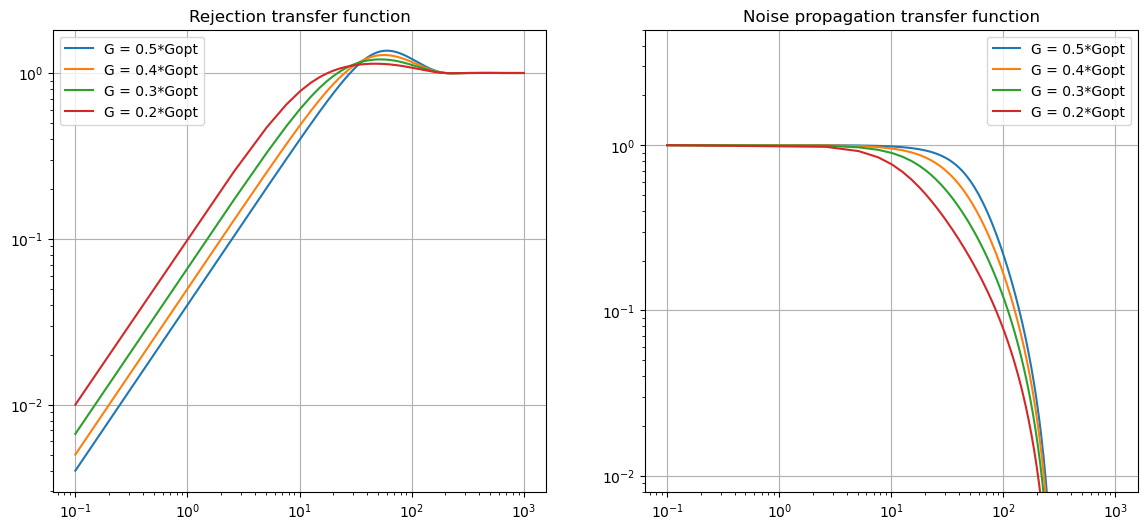

In [9]:
Gopt = xp.pi/(4*T*T*2.5)

restf1 = RESTF(0.5*Gopt,T,2.5/fs,freq)
restf2 = RESTF(0.4*Gopt,T,2.5/fs,freq)
restf3= RESTF(0.3*Gopt,T,2.5/fs,freq)
restf4= RESTF(0.2*Gopt,T,2.5/fs,freq)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf1)),label='G = 0.5*Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf2)),label='G = 0.4*Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf3)),label='G = 0.3*Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf4)),label='G = 0.2*Gopt')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

ntf1 = NTF(0.5*Gopt,T,2.5/fs,freq)
ntf2 = NTF(0.4*Gopt,T,2.5/fs,freq)
ntf3 = NTF(0.3*Gopt,T,2.5/fs,freq)
ntf4 = NTF(0.2*Gopt,T,2.5/fs,freq)

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='G = 0.5*Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='G = 0.4*Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf3)),label='G = 0.3*Gopt')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf4)),label='G = 0.2*Gopt')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')

Text(0.5, 1.0, 'Noise propagation transfer function')

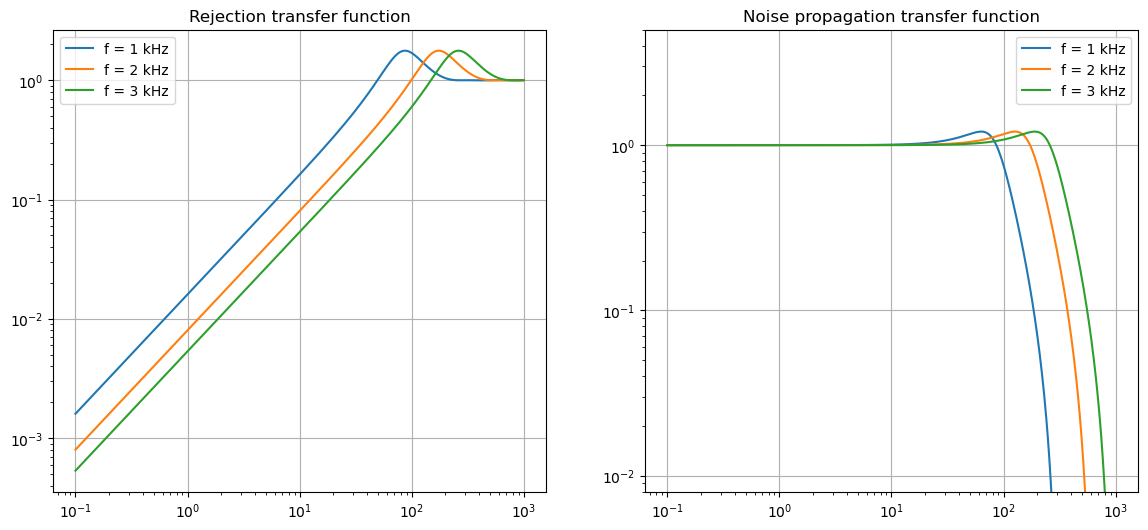

In [10]:
Gopt = xp.pi/(4*T*T*2)

fs = 1000
f2 = 2*fs
f3 = 3*fs

restf1 = RESTF(Gopt,1/fs,2/fs,freq)
restf2 = RESTF(4*Gopt,1/f2,2/f2,freq)
restf3= RESTF(9*Gopt,1/f3,2/f3,freq)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf1)),label='f = 1 kHz')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf2)),label='f = 2 kHz')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(restf3)),label='f = 3 kHz')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

ntf1 = NTF(Gopt,1/1000,Td,freq)
ntf2 = NTF(4*Gopt,1/f2,2/f2,freq)
ntf3 = NTF(9*Gopt,1/f3,2/f3,freq)

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='f = 1 kHz')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='f = 2 kHz')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf3)),label='f = 3 kHz')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')

In [11]:
# splattOLTF = lambda G,T,Td,f: G*T * (xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi/2)
# splattTF = lambda G,T,Td,f: 1.0/(1.0+OLTF(G,T,Td,f))

# tf = splattTF(Gopt,1/1818,2/1818,freq)
# amp = xp.abs(tf)
# ang = xp.unwrap(xp.angle(tf))

# plt.figure()
# plt.subplot(2,1,1)
# plt.plot(xp.asnumpy(freq),xp.asnumpy(amp))
# plt.grid()
# plt.xscale('log')
# plt.yscale('log')
# # plt.ylim([1e-8,1e-2])

# plt.subplot(2,1,2)
# plt.plot(xp.asnumpy(freq),xp.asnumpy(ang*180/xp.pi))
# plt.grid()
# plt.xscale('log')
# # plt.ylim([-270,0])
# # plt.yticks([0,-90,-180,-270])

Text(0.5, 1.0, 'Noise propagation transfer function')

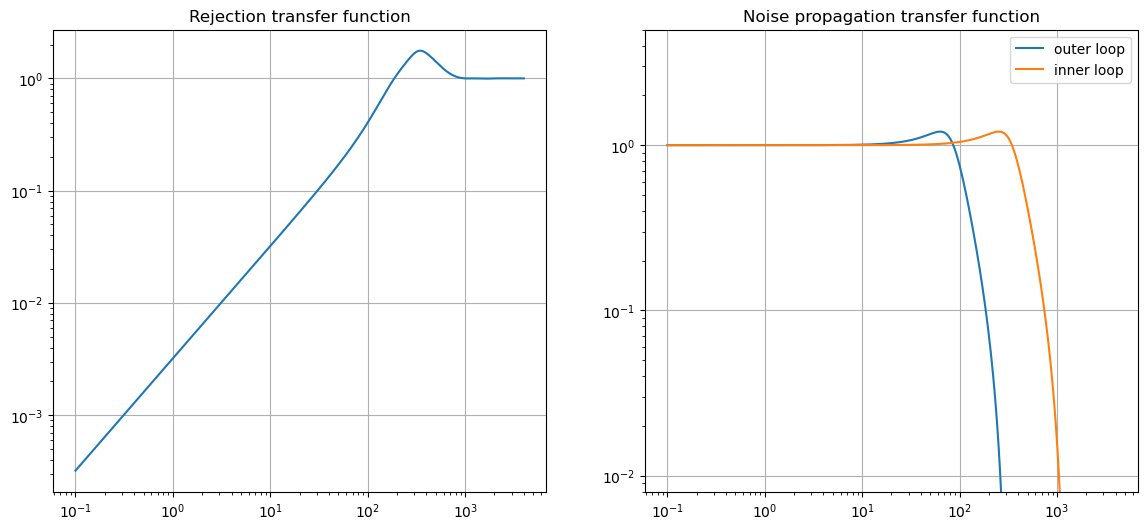

In [12]:
# Nested staging
f1 = 1000
f2 = 4000
freq = xp.linspace(0.1,f2,1000)

oltf1 = OLTF(Gopt,1/f1,2/f1,freq)
oltf2 = OLTF(Gopt*(f2/f1)**2,1/f2,2/f2,freq)

nestao_tf = 1.0/(1.0+oltf1+oltf2)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(nestao_tf)))
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

ntf1 = oltf1/(1+oltf1)
ntf2 = oltf2/(1+oltf2)

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='outer loop')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='inner loop')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')

Text(0.5, 1.0, 'Noise propagation transfer function')

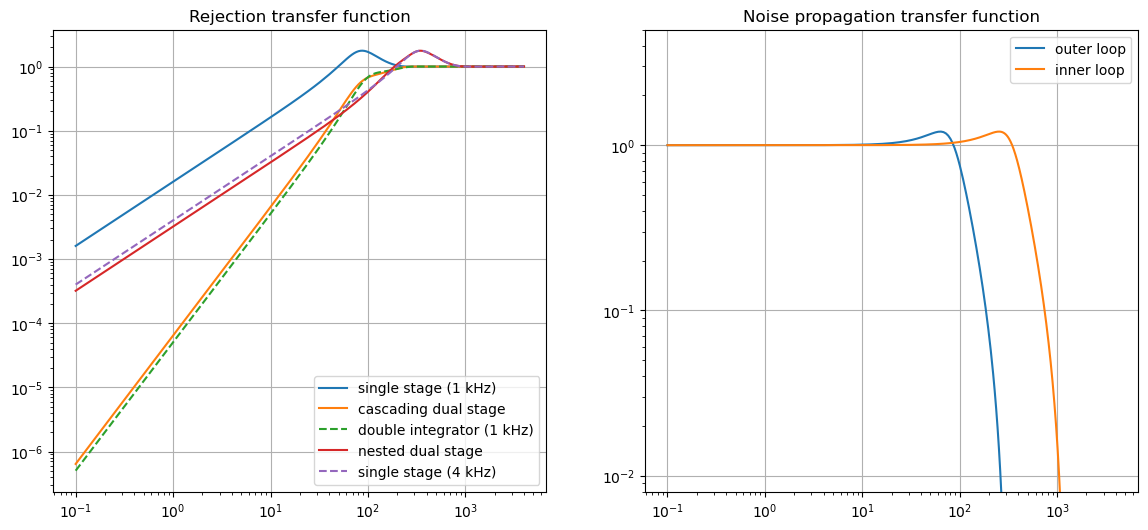

In [28]:
# Cascading
f1 = 1000
f2 = 4000
freq = xp.linspace(0.1,f2,1000)

oltf1 = OLTF(Gopt,1/f1,2/f1,freq)
oltf2 = OLTF(Gopt*(f2/f1)**2,1/f2,2/f2,freq)

DOLTF = lambda G,T,Td,f: G*T/om(f)**2 * (xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi)
dGopt = 2*xp.pi/(4*(1/f1)**3*2)

ssao_tf = 1.0/(1.0+oltf1)
cascao_tf = 1.0/(1.0+oltf1*oltf2)
ssao4khz_tf = 1.0/(1.0+oltf2)
nestao_tf = 1.0/(1.0+oltf1+oltf2)
dint_tf = 1.0/(1.0+DOLTF(dGopt,1/f1,2/f1,freq))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ssao_tf)),label='single stage (1 kHz)')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(cascao_tf)),label='cascading dual stage')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(dint_tf)),'--',label='double integrator (1 kHz)')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(nestao_tf)),label='nested dual stage')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ssao4khz_tf)),'--',label='single stage (4 kHz)')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Rejection transfer function')

plt.subplot(1,2,2)
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf1)),label='outer loop')
plt.plot(xp.asnumpy(freq),xp.asnumpy(xp.abs(ntf2)),label='inner loop')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([8e-3,5])
plt.title('Noise propagation transfer function')